# This notebooks aims at visualizing the content of the MNIST dataset
As a fist step, we use keras to download the dataset.

Then we print the shape of it.

In [1]:
import keras
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print "input of training set has shape {} and output has shape {}".format(x_train.shape, y_train.shape)
print "input of testing set has shape {} and output has shape {}".format(x_test.shape, y_test.shape)

Using TensorFlow backend.


input of training set has shape (60000, 28, 28) and output has shape (60000,)
input of testing set has shape (10000, 28, 28) and output has shape (10000,)


In case it needs disambiguation, we plot some arrays corresponding to the X values and some of the Y values:

The first 15 <X_train> values:


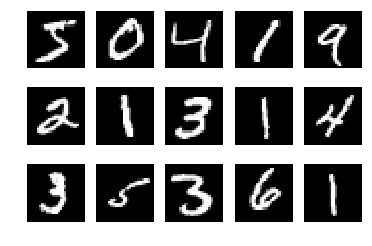

The first 15 <y_test> values:
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

print "The first 15 <X_train> values:"
fig, axs = plt.subplots(3,5)
axs = [b for a in axs for b in a]
for i in range(3*5):
    axs[i].imshow(x_train[i], cmap='gray')
    axs[i].axis('off')
plt.show()

print "The first 15 <y_test> values:"
print y_train[: 3 * 5]

---
Now, we are sure that X_train contains grey-scaled images and Y_train the digit corresponding to its X_train image.

### Data distribution
Next step consists in knowing how is our data distibuted

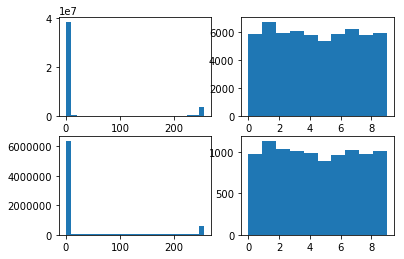

Standard deviation of x_train is 78.5674899834 and mean is 33.3184214498
Standard deviation of x_test is 79.1724632223 and mean is 33.7912244898


In [3]:
fig, axs = plt.subplots(2,2)
axs[0][0].hist(x_train.reshape([-1]), bins = 25)
axs[0][1].hist(y_train.reshape([-1]), bins = 10)
axs[1][0].hist(x_test.reshape([-1]), bins = 25)
axs[1][1].hist(y_test.reshape([-1]), bins = 10)
plt.show()

print "Standard deviation of x_train is {} and mean is {}".format(
    x_train.std(), x_train.mean())
print "Standard deviation of x_test is {} and mean is {}".format(
    x_test.std(), x_test.mean())

Left plots tells us that the Xs are ranging in $[0, 255]$ and that most of the pixels are around zero.

Right plots shows the distribution of the 10 labels MNIST has. 
In both cases (train and test) we learn that "5" is the least represented digit and "1" is the most represented one.

### Data normalization
As we'll see, we rather normlize and center this data such that X_train has a standard deviation of one and a mean of zero

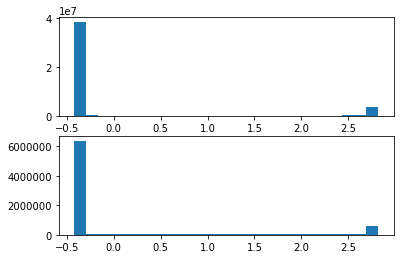

Standard deviation of x_train is 1.0 and mean is -3.06463849007e-17
Standard deviation of x_test is 1.00770004539 and mean is 0.00601779489285


In [4]:
# Normalize the MNIST data
def data_preprocessing(data, std, mean):
    data = data - mean
    data = data / std
    return data

std = x_train.std()
mean = x_train.mean()
x_train = data_preprocessing(x_train, std, mean)
x_test = data_preprocessing(x_test, std, mean)

# Show the results
fig, axs = plt.subplots(2,1)
axs[0].hist(x_train.reshape([-1]), bins = 25)
axs[1].hist(x_test.reshape([-1]), bins = 25)
plt.show()

print "Standard deviation of x_train is {} and mean is {}".format(
    x_train.std(), x_train.mean())
print "Standard deviation of x_test is {} and mean is {}".format(
    x_test.std(), x_test.mean())